The following code is to make basic analysis on the data survey data.
Planned:
- Age distribution
- Gender distribution
- Geographical location
- Academic institutions distribution
- Devices needed

In [6]:
#import necessary libraries
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import unidecode
import os

In [3]:


# where all survey answers are stored:
filePath = "/home/andre/Documents/repositories/amchagas/map_fosh_demand/survey/answers/"

#use code to take all the file names from that folder:
fileNames = os.listdir(filePath)


In [4]:
#
allEntries = list() # create list to hold answers
allHeaders = list() # create list to hold headers (questions in each language)
for file in fileNames:
    fh = open(filePath+file,"r") #file handle just for first file for now
    rawData = csv.reader(fh,dialect = csv.excel_tab) # create iterator for the tsv separated file 
    first_read = 1
    
    for entry in rawData: # run the iterator
        if first_read == 1:
            allHeaders.append(entry)
            first_read = 0
        else:
            allEntries.append(entry) #append each run to list

    fh.close() # whend done, close file

In [7]:


headers = pd.DataFrame(allHeaders)
data = pd.DataFrame(allEntries) # transform list into pandas data frame

headers



,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,",0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Timestamp,Sexo:,Idade (em anos),País:,Estado:,Cidade:,Escolaridade:,Formação:,Possui vínculo com alguma instituição?,"Se sim, qual o nome dessa instituição? (opcional)",...,"Poderia em algumas palavras, nos dizer a razão?",Qual(is) equipamento(s) o seu laboratório mais...,Algum projeto já teve de ser alterado por falt...,"Se sim, qual equipamento causou a alteração no...",Caso tenha ocorrido alguma alteração de projet...,Se você pudesse comprar um equipamento novo pa...,Considera viável a opção de adquirir equipamen...,Já teve oportunidade de testar equipamentos de...,Caso já tenha testado produtos de uma nova mar...,"Gostaria de ter acesso, para testes, à equipam..."
2,Gender: This question is entirely OPTIONAL so...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [5]:

#use the index on the left in headers (printed above) to change the language of the questions.
#change the code below in where there are brackets with a number inside to the index number you picked:
#eg headers.loc[0][:] to headers.loc[1][:] (when more languages are available)
#All data from all languages will still be pooled together

data.set_axis([list(range(len(headers.loc[0][:]))),headers.loc[0][:]],axis=1,inplace=True)



In [6]:
#clean data by making all strings lower case with no accents, and removing trailling "." and empty spaces

for column in data:
    data[column] = lowers = [str.lower(i) for i in data[column] ]
    data[column] = [unidecode.unidecode(i) for i in data[column]]
    #print(column)
    for i in range(len(data[column])):# run through all columns
        if len(data[column][i])>0: # exception handling. When people leave an answer blank
            if data[column][i][-1] == " " or data[column][i][-1] == ".":   # remove trailing punctuation
                data[column][i] = data[column][i][:-1]


In [17]:
#display raw data
print(data[24])

                                                    24
0                                 poligrafo (para eeg)
1                             analise elementar chns-o
2                                 microscopio confocal
3                                  uma maquina propria
4                                              hplc-ms
5    citometro de fluxo com imagem (imaging flow cy...
6                                                     
7                             ion mobility ou orbitrap
8                eeg quantitativo com foto estimulador
9                                                 hplc
10                             incubadora com agitacao
11                            computadores workstation
12                                                    
13                                                    
14                                 analisador de gases
15                        nn consigo definir apenas um
16                                              inbody
17        

In [7]:
#get counts for all columns (to plot histograms of the answers)
allCounts = list()
for column in data:
        anssub = list(data[column])
        allCounts.append(dict((x, anssub.count(x)) for x in anssub))

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,Timestamp,Sexo:,Idade (em anos),País:,Estado:,Cidade:,Escolaridade:,Formação:,Possui vínculo com alguma instituição?,"Se sim, qual o nome dessa instituição? (opcional)",...,"Poderia em algumas palavras, nos dizer a razão?",Qual(is) equipamento(s) o seu laboratório mais usa / necessita?,Algum projeto já teve de ser alterado por falta de acesso a equipamentos?,"Se sim, qual equipamento causou a alteração no projeto?","Caso tenha ocorrido alguma alteração de projeto no momento de execução por falta de acesso à equipamentos, qual o motivo?","Se você pudesse comprar um equipamento novo para o laboratório hoje, e verba não fosse um problema, que equipamento seria?",Considera viável a opção de adquirir equipamentos de novas marcas?,Já teve oportunidade de testar equipamentos de novas marcas?,"Caso já tenha testado produtos de uma nova marca, você fez porque","Gostaria de ter acesso, para testes, à equipamentos produzidos por novas marcas e com baixo custo?"
0,8/22/2018 20:04:49,masculino,54,brazil,rio grande norte,natal,doutorado,medicina,"sim, instituicao publica",ufrn,...,pouca divulgacao dos equipamentos e centraliza...,"poligrafo (medida des de sinais bieletricos), ...",sim,actigrafos,por quebra do equipamento existente e demora n...,poligrafo (para eeg),sim,sim,buscava um preco mais acessivel,sim
1,8/22/2018 20:50:50,masculino,28,brazil,sao paulo,presidente prudente,"doutorado, em andamento",quimica-bacharelado,"sim, instituicao publica",unesp,...,muitos equipamentos sao de uso limitado ao gru...,"espectrofotometria uv-vis, espectroscopia ft-ir",sim,analise elementar chns-o; icp-ms; viscosimetro,alteracao no momento de planejamento,analise elementar chns-o,sim,nao,,
2,8/22/2018 20:57:05,feminino,32,brazil,rj,rio de janeiro,doutorado,ciencias biologicas,"sim, instituicao publica",fiocruz,...,,"espectrofotometro, microscopio",nao,,"apesar de dificuldades com equipamentos, nao f...",microscopio confocal,sim,nao,,
3,8/22/2018 21:09:13,masculino,22,brazil,sao paulo,botucatu,"graduacao - bacharelado, em andamento",engenharia de bioprocessos e biotecnologia,"sim, instituicao publica",unesp,...,,computadores,nao tenho conhecimento,nao,nenhuma alteracao no projeto de pesquisa foi n...,uma maquina propria,sim,nao,,
4,8/22/2018 21:30:34,masculino,26,brazil,sao paulo,sao paulo,graduacao - bacharelado,quimica,"sim, instituicao publica",usp,...,,"hplc-dad, gc-ms, rmn(analise paga, feita no iq...",sim,hplc-ms,equipamento indisponivel (outras razoes alem d...,hplc-ms,sim,nao,,
5,8/22/2018 21:34:34,feminino,29,brazil,minas gerais,belo horizonte,doutorado,doutorado em biologia celular,"sim, instituicao publica",ufmg,...,,termocicladores e aparatos de eletroforese,sim,citometro de fluxo e microscopio de fluorescencia,por quebra do equipamento existente e demora n...,citometro de fluxo com imagem (imaging flow cy...,talvez,sim,buscava um preco mais acessivel,sim
6,8/22/2018 21:35:17,masculino,22,brazil,sao paulo,botucatu,em andamento,graduando em engenharia de bioprocessos e biot...,"sim, instituicao publica",universidade estadual paulista julio de mesqui...,...,"muitos pesquisadores e poucos equipamentos, e ...","eletrodos, celulas eletroquimicas, potenciados...",nao,,,,sim,nao,,
7,8/22/2018 21:38:24,masculino,28,brazil,sao paulo,campinas,mestrado,quimica,"sim, instituicao publica",unicamp,...,,qtof,sim,qtof,por quebra do equipamento existente e demora n...,ion mobility ou orbitrap,talvez,nao,,
8,8/22/2018 21:52:10,masculino,42,brazil,rio de janeiro,campos dos goytacazes,doutorado,profissional de educacao fisica,"sim, instituicao privada",,...,,eletroencefalograma (eeg),sim,eeg,equipamento indisponivel (outras razoes alem d...,eeg quantitativo com foto estimulador,sim,nao,,


/home/andre/local_software/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


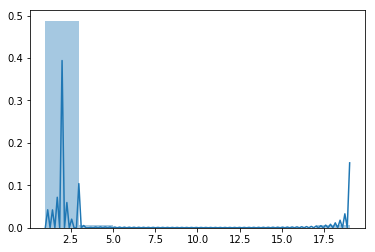

In [14]:
entry = 24

sns.distplot(list(allCounts[entry].values()),label=list(allCounts[entry].keys()))
#sns.distplot(pd.to_numeric(data["Idade (em anos)"]),bins=range(10,90,1))
plt.show()


In [34]:
dummie = pd.DataFrame(index=[0,1,2], columns=[[1,2,3],["t1","r2","r3"]])

In [35]:
dummie

,1,2,3
,t1,r2,r3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN


In [22]:
data.to_csv(path_or_buf=filePath+"data.csv",mode="w")